In [10]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.0)
mpl.rcParams['figure.figsize'] = 10, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

# Kernel Density Estimation

### Generate the Gaussian Mixture that is be Estimated

In [2]:
# 3 Gaussians
m1 = 3.0
m2 = -2.0
m3 = 0.0

s1 = 0.5
s2 = 0.2
s3 = 1.2

n1 = 100
n2 = 100
n3 = 300

In [3]:
# the Gaussian distibution
def gaussian(x, mu, sig2):
    return (1.0 / np.power(2 * sig2 * np.pi, 0.5)) * np.exp(-(np.power(x - mu, 2.)) / (2.0 * sig2))

In [4]:
# get the Gaussian points to plot
ls = np.linspace(-4, 5, 200)
g1 = gaussian(ls, m1, s1) / 5.0
g2 = gaussian(ls, m2, s2) / 5.0
g3 = gaussian(ls, m3, s3) * 3.0 / 5.0
g = g1 + g2 + g3

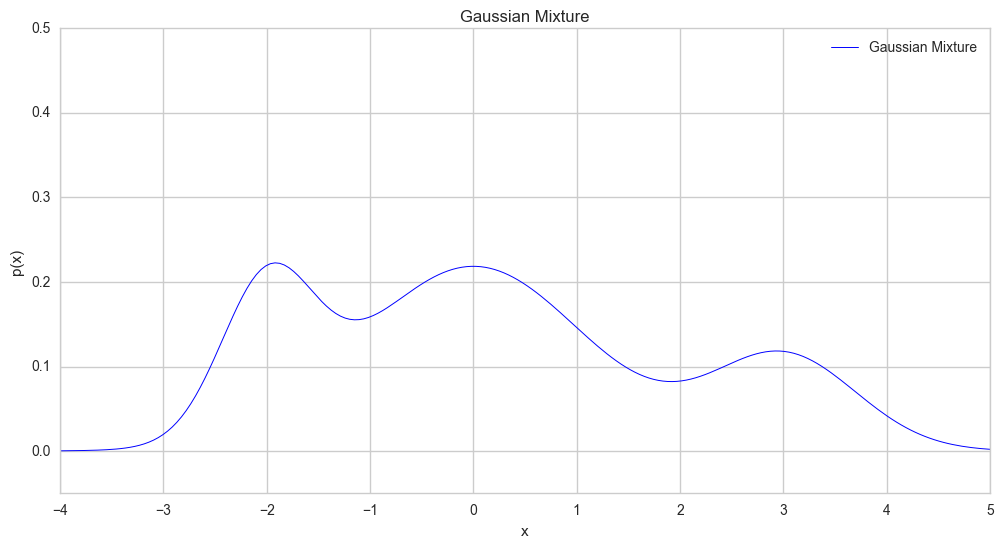

In [5]:
_ = plt.figure(figsize=(12, 6))

# plot the original gaussians
_ = plt.plot(
    ls,
    g,
    c='blue',
    linewidth=0.7,
    label='Gaussian Mixture')

_ = plt.xlim((-4, 5))
_ = plt.ylim((-0.05, 0.5))
_ = plt.title('Gaussian Mixture')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.legend()

### Generate a Sample from the Gaussian Mixture

In [6]:
# generate sample from the Gaussians
sample = np.concatenate([
        np.random.randn(n1) * s1 + m1,
        np.random.randn(n2) * s2 + m2,
        np.random.randn(n3) * s3 + m3])

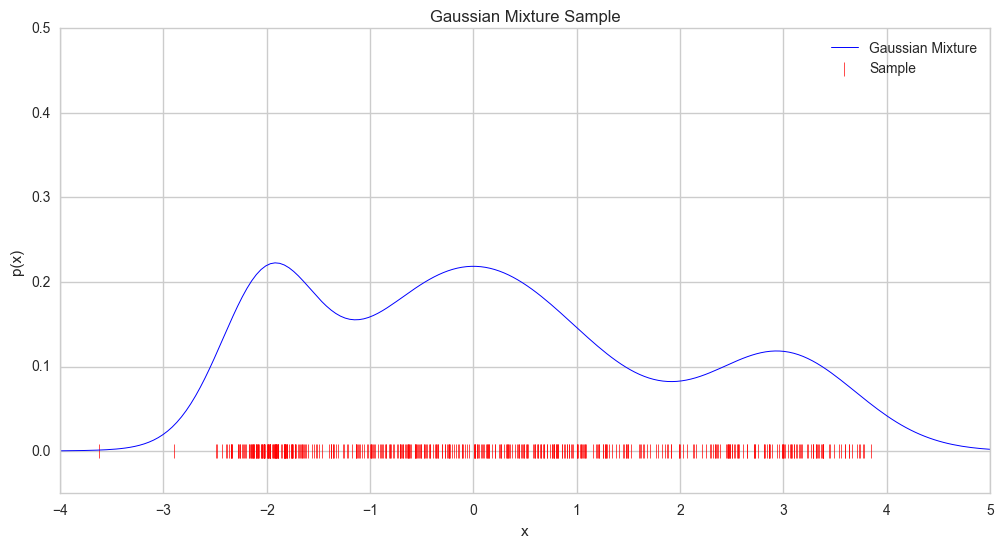

In [7]:
_ = plt.figure(figsize=(12, 6))

# plot the original gaussians
_ = plt.plot(
    ls,
    g,
    c='blue',
    linewidth=0.7,
    label='Gaussian Mixture')

# plot the sample
_ = plt.scatter(
    x=sample,
    y=[0]*len(sample),
    marker='|',
    c='red',
    s=100,
    label='Sample',
    linewidth=0.5)

_ = plt.xlim((-4, 5))
_ = plt.ylim((-0.05, 0.5))
_ = plt.title('Gaussian Mixture Sample')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.legend()

### Gaussian KDE with Different Bandwith Parameters

In [8]:
# kernel density estimations with different bandwith parameters
bandwidths = [0.05, 0.4, 1.5]
kde_labels = [
    'KDE (Too Noisy)',
    'KDE (Good Fit)',
    'KDE (Too Smooth)']
kde_colors = [
    'orange',
    'green',
    'purple']
kdes = []

for i in range(3):
    kdes.append(np.exp(
        sklearn.neighbors.KernelDensity(
            bandwidth=bandwidths[i],
            kernel='gaussian')
        .fit(sample[:, np.newaxis])
        .score_samples(ls[:, np.newaxis])))

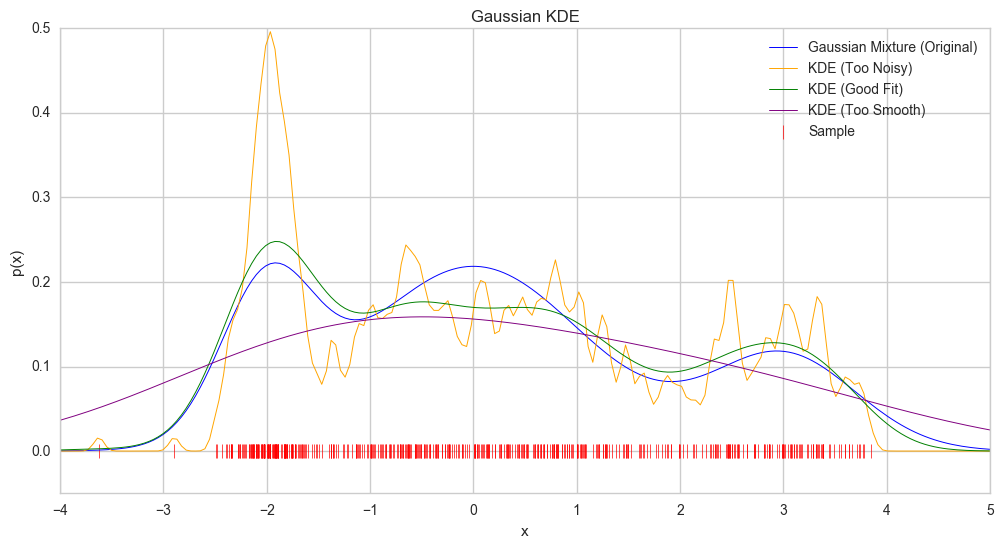

In [9]:
_ = plt.figure(figsize=(12, 6))

# plot the original gaussians
_ = plt.plot(
    ls,
    g,
    c='blue',
    linewidth=0.7,
    label='Gaussian Mixture (Original)')

# plot the sample
_ = plt.scatter(
    x=sample,
    y=[0]*len(sample),
    marker='|',
    c='red',
    s=100,
    label='Sample',
    linewidth=0.5)

# plot KDEs
for i in range(3):
    _ = plt.plot(
        ls,
        kdes[i],
        c=kde_colors[i],
        linewidth=0.7,
        label=kde_labels[i])

_ = plt.xlim((-4, 5))
_ = plt.ylim((-0.05, 0.5))
_ = plt.title('Gaussian KDE')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.legend()